In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import process_library as preprocess
import preprocessing
import cleavage_rate as clv
reload(clv)
reload(preprocess)
reload(preprocessing)
import sys
sys.path.append('../../predict_pclv_Stijn')
sys.path.append('../../code_Boyle')
import Nucleaseq_data_processing as processing
import calculate_cleavage_rate as clv2
reload(processing)

<module 'Nucleaseq_data_processing' from '../../predict_pclv_Stijn\Nucleaseq_data_processing.pyc'>

In [10]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/target'
xdataE, ydataE, yerrE = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data+ 'E/')
xdataD, ydataD, yerrD = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data+ 'D/')

## Sequence independent, combined

Text(0,0.5,'Measured on-rate (Hz)')

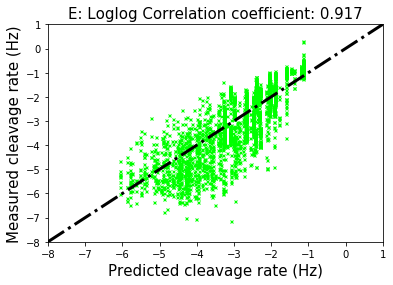

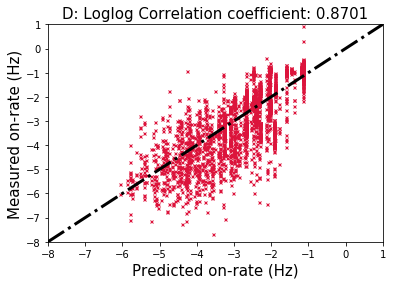

In [3]:
filename = 'fit_9_4_2019_sim_6.txt'
path = '../../fits_Stijn/9_4_2019/'
data = pd.read_table(path+filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 44']
final_par_np = final_par.values
model_ID = ['Clv_Saturated_general_energies_v2','general_energies_no_kPR']
guide =20

dataE = []
fitE = []
dataD = []
fitD = []

for i in range(len(xdataE)):
    cleavagetemp, _ = np.log10(clv2.calc_clv_on(final_par_np,model_ID,xdataE[i],guide))
    for j in range(len(ydataE[i][0])):
        if (ydataE[i][0][j])>(-10):
            dataE.append(ydataE[i][0][j])
            fitE.append(cleavagetemp)

for i in range(len(xdataD)):
    cleavagetemp, _ = np.log10(clv2.calc_clv_on(final_par_np,model_ID,xdataD[i],guide))
    for j in range(len(ydataD[i][0])):
        if (ydataD[i][0][j])>(-10):
            dataD.append(ydataD[i][0][j])
            fitD.append(cleavagetemp)
        
plt.figure()
plt.plot(fitE,dataE,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('E: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataE,fitE])[0][1],4)), fontsize=15)
plt.xlabel('Predicted cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(fitD,dataD,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('D: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataD,fitD])[0][1],4)), fontsize=15)
plt.xlabel('Predicted on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)

## Sequence independent, cleavage fit

Text(0,0.5,'Measured on-rate (Hz)')

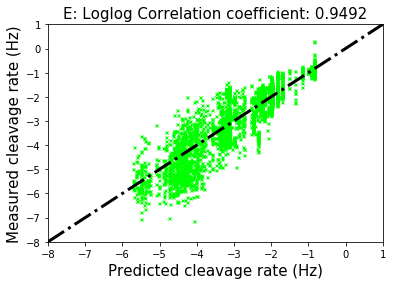

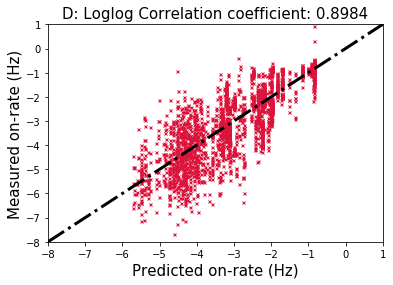

In [4]:
filename = 'fit_3_4_2019_sim_1.txt'
path = '../../fits_Stijn/3_4_2019/'
data = pd.read_table(path+filename,index_col=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 42']
final_par_np = final_par.values
model_ID = ['Clv_Saturated_general_energies_v2','general_energies_no_kPR'][0]
guide =20


dataE = []
fitE = []
dataD = []
fitD = []

for i in range(len(xdataE)):
    cleavagetemp = np.log10(clv2.calc_clv_rate_fast(final_par_np,model_ID,xdataE[i],guide))
    for j in range(len(ydataE[i][0])):
        if (ydataE[i][0][j])>(-10):
            dataE.append(ydataE[i][0][j])
            fitE.append(cleavagetemp)

for i in range(len(xdataD)):
    cleavagetemp = np.log10(clv2.calc_clv_rate_fast(final_par_np,model_ID,xdataD[i],guide))
    for j in range(len(ydataD[i][0])):
        if (ydataD[i][0][j])>(-10):
            dataD.append(ydataD[i][0][j])
            fitD.append(cleavagetemp)
        
plt.figure()
plt.plot(fitE,dataE,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('E: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataE,fitE])[0][1],4)), fontsize=15)
plt.xlabel('Predicted cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(fitD,dataD,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('D: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataD,fitD])[0][1],4)), fontsize=15)
plt.xlabel('Predicted on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)

## Sequence independent, fitted to smm E+D

Text(0,0.5,'Measured on-rate (Hz)')

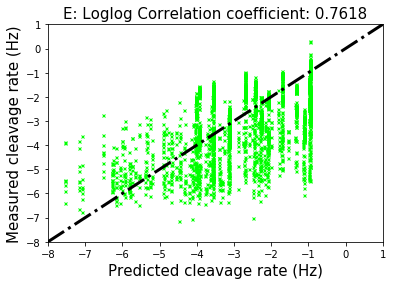

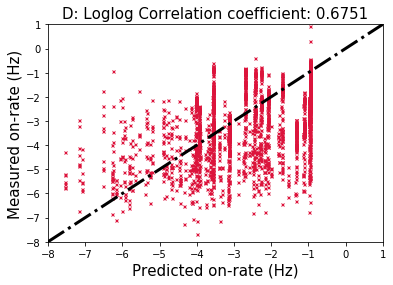

In [22]:
filename = 'fit_30_4_2019a_sim_1.txt'
path = '../../fits_Stijn/30_4_2019a/'
data = pd.read_table(path+filename,index_col=False,error_bad_lines=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 42']
parameters = final_par.values
parameters[6] = float(parameters[6])
model_ID = 'Clv_Saturated_general_energies_v2'
guide = 20

dataE = []
fitE = []
dataD = []
fitD = []

for i in range(len(xdataE)):
    cleavagetemp = np.log10(clv2.calc_clv_rate_fast(parameters,model_ID,xdataE[i],guide))
    for j in range(len(ydataE[i][0])):
        if (ydataE[i][0][j])>(-10):
            dataE.append(ydataE[i][0][j])
            fitE.append(cleavagetemp)

for i in range(len(xdataD)):
    cleavagetemp = np.log10(clv2.calc_clv_rate_fast(parameters,model_ID,xdataD[i],guide))
    for j in range(len(ydataD[i][0])):
        if (ydataD[i][0][j])>(-10):
            dataD.append(ydataD[i][0][j])
            fitD.append(cleavagetemp)
        
plt.figure()
plt.plot(fitE,dataE,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('E: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataE,fitE])[0][1],4)), fontsize=15)
plt.xlabel('Predicted cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(fitD,dataD,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('D: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataD,fitD])[0][1],4)), fontsize=15)
plt.xlabel('Predicted on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)

## Sequence dependent, v1, fitted to smm data only

In [3]:
reload(preprocessing)
xdata,ydata,yerr = preprocessing.prepare_multiprocessing_seq_dep('combined_data_DE.csv','../../data_nucleaseq_Finkelsteinlab/')

Skipping line 1354: expected 38 fields, saw 107



Text(0,0.5,'Measured on-rate (Hz)')

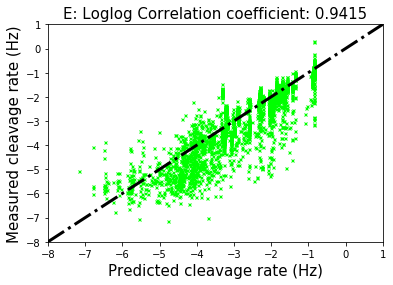

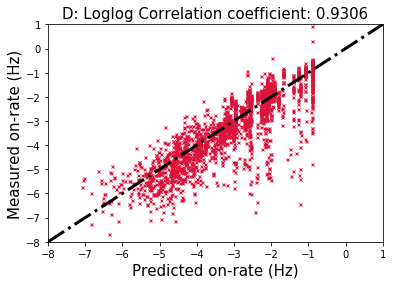

In [6]:
filename = 'fit_15_4_2019a_sim_1.txt'
path = '../../fits_Stijn/15_4_2019a/'
data = pd.read_table(path+filename,index_col=False,error_bad_lines=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 35']
parameters = final_par.values
parameters[6] = float(parameters[6])
modelID = 'Sequence_dependent_clv_v1'

guideE = 'CGCAGAGTAGAAATACGCAG'
guideD = 'GTACCGTAAGGTGAATAGTG'

dataE = []
fitE = []
dataD = []
fitD = []

for i in range(len(xdata)):
    if xdata[i][1]=='CGCAGAGTAGAAATACGCAG':
        cleavagetemp = np.log10(clv.calc_clv_rate_fast(parameters,modelID,[xdata[i][0],guideE],20))
        for j in range(len(ydata[i])):
            if (ydata[i][j])>(-10):
                dataE.append(ydata[i][j])
                fitE.append(cleavagetemp)
    elif xdata[i][1]=='GTACCGTAAGGTGAATAGTG':
        cleavagetemp = np.log10(clv.calc_clv_rate_fast(parameters,modelID,[xdata[i][0],guideD],20))
        for j in range(len(ydata[i])):
            if (ydata[i][j])>(-10):
                dataD.append(ydata[i][j])
                fitD.append(cleavagetemp)
            
plt.figure()
plt.plot(fitE,dataE,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('E: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataE,fitE])[0][1],4)), fontsize=15)
plt.xlabel('Predicted cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(fitD,dataD,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('D: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataD,fitD])[0][1],4)), fontsize=15)
plt.xlabel('Predicted on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)

## Sequence dependent v2, smm only

Text(0,0.5,'Measured on-rate (Hz)')

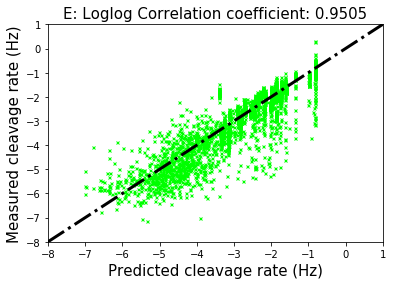

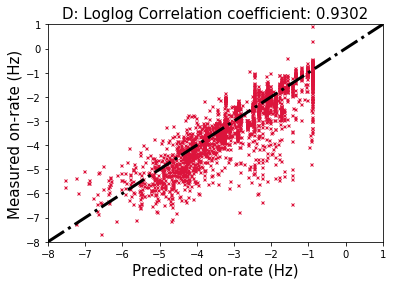

In [7]:
filename = 'fit_24_4_2019a_sim_1_better1.txt'
path = '../../fits_Stijn/24_4_2019a/'
data = pd.read_table(path+filename,index_col=False,error_bad_lines=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 38']
parameters = final_par.values
parameters[6] = float(parameters[6])
modelID = 'Sequence_dependent_clv_v2'

guideE = 'CGCAGAGTAGAAATACGCAG'
guideD = 'GTACCGTAAGGTGAATAGTG'

dataE = []
fitE = []
dataD = []
fitD = []

for i in range(len(xdata)):
    if xdata[i][1]=='CGCAGAGTAGAAATACGCAG':
        cleavagetemp = np.log10(clv.calc_clv_rate_fast(parameters,modelID,[xdata[i][0],guideE],20))
        for j in range(len(ydata[i])):
            if (ydata[i][j])>(-10):
                dataE.append(ydata[i][j])
                fitE.append(cleavagetemp)
    elif xdata[i][1]=='GTACCGTAAGGTGAATAGTG':
        cleavagetemp = np.log10(clv.calc_clv_rate_fast(parameters,modelID,[xdata[i][0],guideD],20))
        for j in range(len(ydata[i])):
            if (ydata[i][j])>(-10):
                dataD.append(ydata[i][j])
                fitD.append(cleavagetemp)
            
plt.figure()
plt.plot(fitE,dataE,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('E: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataE,fitE])[0][1],4)), fontsize=15)
plt.xlabel('Predicted cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(fitD,dataD,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('D: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataD,fitD])[0][1],4)), fontsize=15)
plt.xlabel('Predicted on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)

## Sequence dependent v3, smm only, based on a cleavage fit landscape

Text(0,0.5,'Measured on-rate (Hz)')

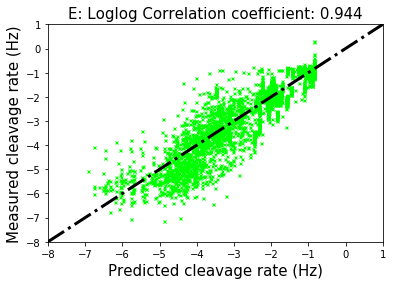

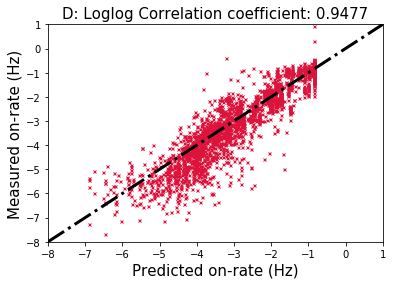

In [21]:
filename = 'fit_29_4_2019a_sim_1.txt'
path = '../../fits_Stijn/29_4_2019a/'
data = pd.read_table(path+filename,index_col=False,error_bad_lines=False)
final_par = data.loc[len(data)-1,'Parameter 1':'Parameter 14']
parameters = final_par.values
parameters[6] = float(parameters[6])
modelID = 'Sequence_dependent_clv_v3'

guideE = 'CGCAGAGTAGAAATACGCAG'
guideD = 'GTACCGTAAGGTGAATAGTG'

dataE = []
fitE = []
dataD = []
fitD = []

for i in range(len(xdata)):
    if xdata[i][1]=='CGCAGAGTAGAAATACGCAG':
        cleavagetemp = np.log10(clv.calc_clv_rate_fast(parameters,modelID,[xdata[i][0],guideE],20))
        for j in range(len(ydata[i])):
            if (ydata[i][j])>(-10):
                dataE.append(ydata[i][j])
                fitE.append(cleavagetemp)
    elif xdata[i][1]=='GTACCGTAAGGTGAATAGTG':
        cleavagetemp = np.log10(clv.calc_clv_rate_fast(parameters,modelID,[xdata[i][0],guideD],20))
        for j in range(len(ydata[i])):
            if (ydata[i][j])>(-10):
                dataD.append(ydata[i][j])
                fitD.append(cleavagetemp)
            
plt.figure()
plt.plot(fitE,dataE,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('E: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataE,fitE])[0][1],4)), fontsize=15)
plt.xlabel('Predicted cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(fitD,dataD,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('D: Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataD,fitD])[0][1],4)), fontsize=15)
plt.xlabel('Predicted on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)